# Introduction

The type of data I have chosen to work with is earnings data by gender and region. This data includes information about the average hourly earnings of workers, as well as their gender, age, education level, and region of residence.

Each month the Bureau of Labor Statistics in the US Department of Labor conducts the Current Population Survey (CPS), which provides data on labor force characteristics of the population, including the level of employment, unemployment, and earnings. Approximately 65,000 randomly selected US households are surveyed each month. The sample is chosen by randomly selecting addresses from a database. Details can be found in the Handbook of Labor Statistics and is described on the Bureau of Labor Statistics website (https://www.bls.gov/).

The survey conducted each March is more detailed than in other months and asks questions about earnings during the previous year. The data sets contain data for 2004 (from the March 2005 survey).

I hope to use this data to answer the following __research questions__:

- What is the gender pay gap in different regions?
- How does the earnings vary by age and education level?
- How do earnings vary with age and education level, and is this variation influenced by gender?

I believe that this data is important because it can help us to understand the economic disparities between men and women. By understanding the factors that contribute to the gender pay gap, we can develop policies and programs to help close it.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

### Loading the Data

In [2]:
#read data
pop = pd.read_csv(r'https://raw.githubusercontent.com/ss-surya/Projects/main/Gender%20Pay%20Gap%20Analysis%20on%20US%20Population%20Survey/US%20Population%20Survey%202004.csv')

# sanity check - make sure data was read in as expected
pop.head()

,earnings,gender,age,region,education
0,20.673077,male,31,South,14
1,24.278847,male,50,South,12
2,10.149572,male,36,South,12
3,8.894231,female,33,South,10
4,6.410256,female,56,South,10


# Data Summary

__Source:__ https://vincentarelbundock.github.io/Rdatasets/datasets.html -> https://vincentarelbundock.github.io/Rdatasets/doc/AER/CPSSW04.html

__Data Dictionary__:

- earnings - average hourly earnings (sum of annual pretax wages, salaries, tips, and bonuses, divided by the number of hours - worked annually).
- gender - factor indicating gender.
- age - age in years.
- region - factor indicating region of residence ("Northeast", "Midwest", "South", "West").
- education - number of years of education.

__Data Types__:
- earnings - Numeric Continuous
- gender - Categorical Regular
- age - Numeric Discrete
- region - Categorical Regular
- education - Numeric Discrete

The dataset can be used  for many ***use cases***. Few examples are
- (2 attributes) Is earnings related to gender
- (2 attributes) Is there a relationship between earnings and age
- (2 attributes) How earnings varies between regions
- (2 attributes) How influential is education level on earnings
- (3 attributes) Analyzing the relationship between earnings and gender, age
- (3 attributes) Analyzing the relationship between earnings and region, education level
- (4 attributes) Analyzing the relationship between earnings and gender, age, education level
- (5 attributes) Analyzing the relationship between earnings and gender, age, education level, region

In [3]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61395 entries, 0 to 61394
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   earnings   61395 non-null  float64
 1   gender     61395 non-null  object 
 2   age        61395 non-null  int64  
 3   region     61395 non-null  object 
 4   education  61395 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


# Exploratory Data Analysis (EDA)

## Summary Statistics

In [4]:
#Dimension of the Data
print('Number of Rows:',pop.shape[0],'\nNumber of Columns:',pop.shape[1])

Number of Rows: 61395 
Number of Columns: 5


In [5]:
# Describe the numerical variables
numerical_columns = pop.select_dtypes(include=['int', 'float']).describe()

# Describe the categorical variables
categorical_columns = pop.select_dtypes(include=['object']).describe()

print('Summary Statistics: Numerical Columns')
display (numerical_columns)
print('Summary Statistics: Categorical Columns')
display (categorical_columns)

Summary Statistics: Numerical Columns


,earnings,age,education
count,61395.000000,61395.000000,61395.000000
mean,18.435115,41.231403,13.644320
std,10.127171,10.586667,2.460676
min,2.003205,21.000000,6.000000
25%,11.057693,33.000000,12.000000
50%,16.250000,41.000000,13.000000
75%,23.557692,49.000000,16.000000
max,72.115387,64.000000,20.000000


Summary Statistics: Categorical Columns


,gender,region
count,61395,61395
unique,2,4
top,male,South
freq,34348,18963


## Univariate Analysis
__Approach__
- Get Summary Statistics
- Plot Graphs using both Matplotlib and Seaborn libraries.
    - For Categorical columns Bar plot is used.
    - For Numerical columns Histogram and Boxplot is used.
- Use Subplots to show the plots in the same view
- Use proper title, labels and tick params

### Gender

In [6]:
# get summary statistics
pop['gender'].describe()

count     61395
unique        2
top        male
freq      34348
Name: gender, dtype: object

The __Gender__ attribute is comprised of 2 distinct categorical values, with the most frequently occurring value being 'male'.

In [7]:
# display unique values of Gender
pop.gender.unique()

array(['male', 'female'], dtype=object)

In [8]:
# get the value counts for the Gender variable
gender_counts = pop['gender'].value_counts()
gender_counts

male      34348
female    27047
Name: gender, dtype: int64

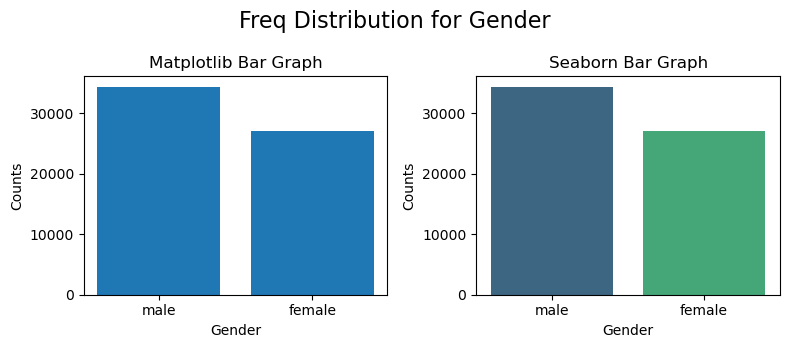

In [9]:
# create a bar plot of the Gender's value counts

# Define 1x2 plot and add title
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))
plt.suptitle("Freq Distribution for Gender", fontsize=16)

# Code for matplotlib plot along with title, label
axes[0].bar(gender_counts.index, gender_counts.values)
axes[0].set_title("Matplotlib Bar Graph")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Counts")

# Code for seaborn plot along with title, label
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
axes[1].set_title("Seaborn Bar Graph")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Counts")

# Display plot
plt.tight_layout()
plt.show()

__Insights:__

The graph shows that there are two unique values for Gender. It is evident that a larger number of male participants participated in the survey compared to female participants.

### Region

In [10]:
# get summary statistics
pop['region'].describe()

count     61395
unique        4
top       South
freq      18963
Name: region, dtype: object

The __Region__ attribute is comprised of 4 distinct categorical values, with the most frequently occurring value being 'South'.

In [11]:
# display unique values of Gender
pop.region.unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [12]:
# get the value counts for the Gender variable
region_counts = pop['region'].value_counts()
region_counts

South        18963
Midwest      15136
West         14925
Northeast    12371
Name: region, dtype: int64

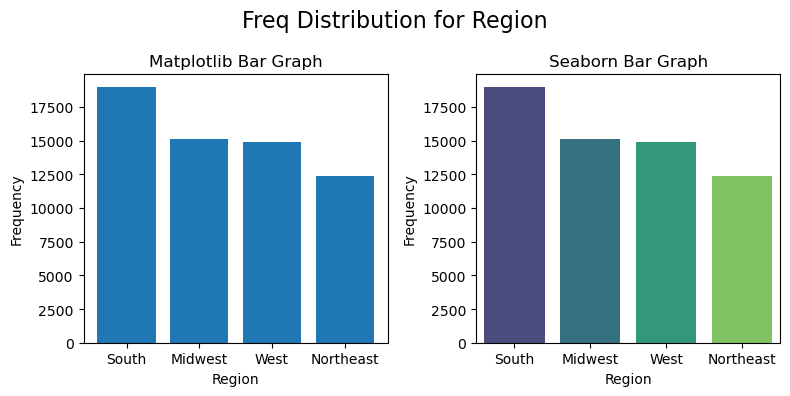

In [13]:
# create a bar plot of the Region's value counts

# Define 1x2 plot and add title
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle("Freq Distribution for Region", fontsize=16)

# Code for matplotlib along with parameters like title, labels and tick 
axes[0].bar(region_counts.index, region_counts.values)
axes[0].set_title("Matplotlib Bar Graph")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Frequency")

# Code for seaborn along with parameters like title, labels and tick 
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
axes[1].set_title("Seaborn Bar Graph")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Frequency")

# Display plot
plt.tight_layout()
plt.show()

__Insights__:

The graph shows that there are four unique values for Region. It is evident that a larger number of survey participants are from southern part of the USA followed by Midwest, West and Northeast.

### Earnings

In [14]:
# get summary statistics
pop['earnings'].describe()

count    61395.000000
mean        18.435115
std         10.127171
min          2.003205
25%         11.057693
50%         16.250000
75%         23.557692
max         72.115387
Name: earnings, dtype: float64

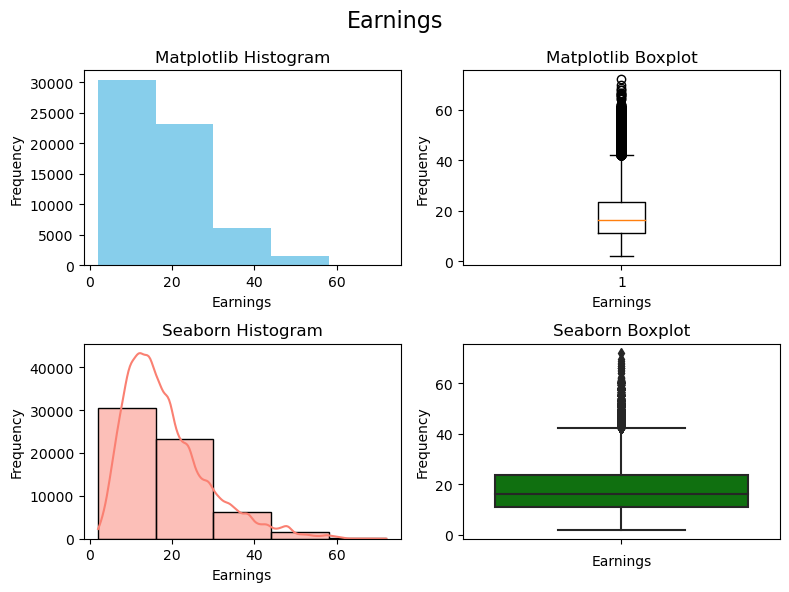

In [15]:
# create a histogram + boxplot for the distribution of 'Earnings'

#Define 2x2 plot and add title
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
plt.suptitle('Earnings', fontsize=16)

#Matplotlib Histogram
axes[0,0].hist(pop["earnings"], bins=5, color='skyblue')
axes[0,0].set_title('Matplotlib Histogram')

#Matplotlib Boxplot
axes[0,1].boxplot(pop["earnings"])
axes[0,1].set_title('Matplotlib Boxplot')

#Seaborn Histogram
sns.histplot(data=pop, x="earnings", bins=5, kde=True, color='salmon', ax=axes[1, 0])
axes[1,0].set_title('Seaborn Histogram')

#Seaborn Boxplot
sns.boxplot(data= pop, y= "earnings", color='green', ax=axes[1, 1])
axes[1,1].set_title('Seaborn Boxplot')

#Add axis labels
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('Earnings')
        axes[i,j].set_ylabel('Frequency')

#Display plot
plt.tight_layout()
plt.show()

__Insights__: 

The summary statistics, histogram, and boxplot show that the distribution of the __Earnings__ attribute is right-skewed, with a mean value (18.435) that exceeds the median (16.25). Both the histogram and the boxplot show evidence of possible outliers, i.e., __Earnings__ values that fall far beyond the upper whisker of the distribution as shown in the boxplot.The plot exhibits positive skewness, indicating that there are slightly more people earning towards the lower end of the range than the higher end. 

### Age

In [16]:
# get summary statistics
pop['age'].describe()

count    61395.000000
mean        41.231403
std         10.586667
min         21.000000
25%         33.000000
50%         41.000000
75%         49.000000
max         64.000000
Name: age, dtype: float64

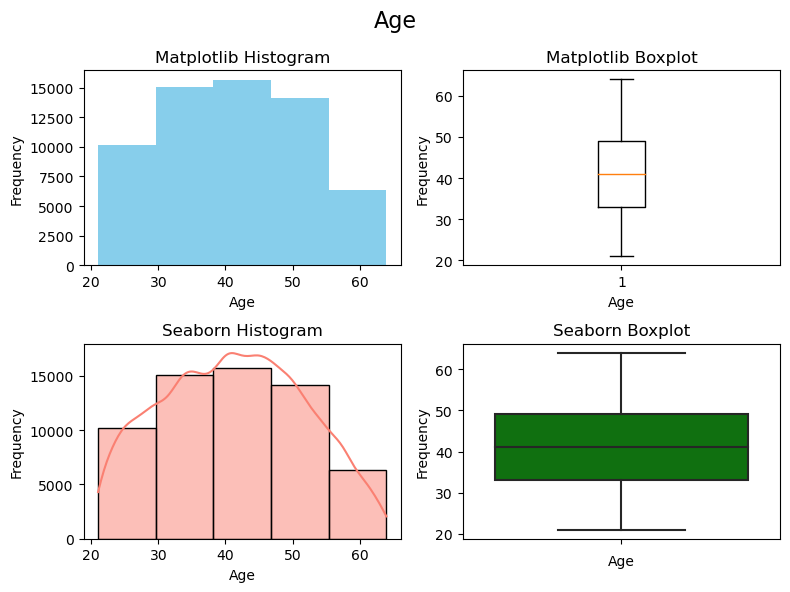

In [17]:
#Define 2x2 plot and add title
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
plt.suptitle('Age', fontsize=16)

#Matplotlib Histogram
axes[0,0].hist(pop["age"], bins=5, color='skyblue')
axes[0,0].set_title('Matplotlib Histogram')

#Matplotlib Boxplot
axes[0,1].boxplot(pop["age"])
axes[0,1].set_title('Matplotlib Boxplot')

#Seaborn Histogram
sns.histplot(data=pop, x="age", bins=5, kde=True, color='salmon', ax=axes[1, 0])
axes[1,0].set_title('Seaborn Histogram')

#Seaborn Boxplot
sns.boxplot(data= pop, y= "age", color='green', ax=axes[1, 1])
axes[1,1].set_title('Seaborn Boxplot')

#Add axis labels
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('Age')
        axes[i,j].set_ylabel('Frequency')

#Display plot
plt.tight_layout()
plt.show()

__Insights:__

The summary statistics, histogram, and boxplot show that the __Age__ mean value (41.23) is very close to the median value (41).
The plot exhibits symmetric condition, indicating that the ages of the people participated are normally distributed. 

### Education

In [18]:
# get summary statistics
pop['education'].describe()

count    61395.000000
mean        13.644320
std          2.460676
min          6.000000
25%         12.000000
50%         13.000000
75%         16.000000
max         20.000000
Name: education, dtype: float64

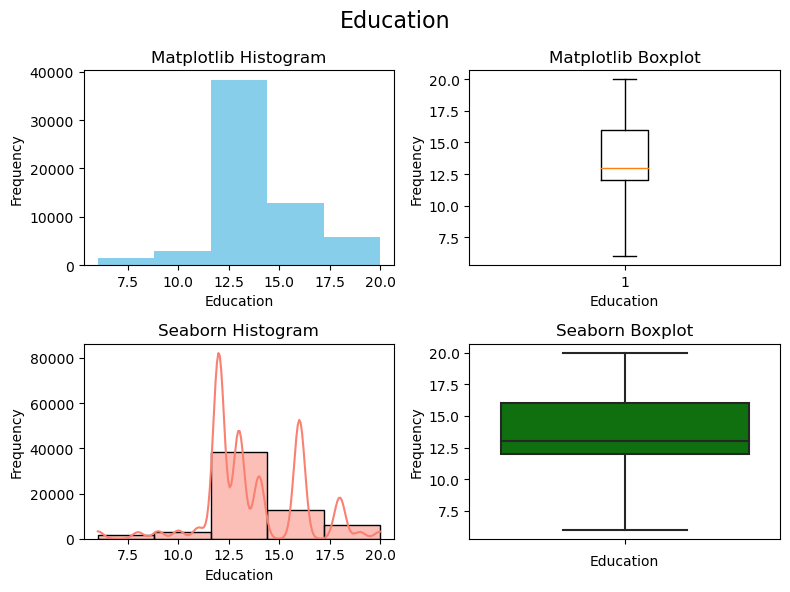

In [19]:
#Define 2x2 plot and add title
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
plt.suptitle('Education', fontsize=16)

#Matplotlib Histogram
axes[0,0].hist(pop["education"], bins=5, color='skyblue')
axes[0,0].set_title('Matplotlib Histogram')

#Matplotlib Boxplot
axes[0,1].boxplot(pop["education"])
axes[0,1].set_title('Matplotlib Boxplot')

#Seaborn Histogram
sns.histplot(data=pop, x="education", bins=5, kde=True, color='salmon', ax=axes[1, 0])
axes[1,0].set_title('Seaborn Histogram')

#Seaborn Boxplot
sns.boxplot(data= pop, y= "education", color='green', ax=axes[1, 1])
axes[1,1].set_title('Seaborn Boxplot')

#Add axis labels
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('Education')
        axes[i,j].set_ylabel('Frequency')

#Display plot
plt.tight_layout()
plt.show()

__Insights__:

It's evident from the summary statistics, histogram, and boxplot that the median education level is 13. The plot exhibits positive skewness, indicating that there are slightly more people having lower education level than the people with higher level. 

## Bivariate Analysis
__Approach__
- Plot Graphs using both Matplotlib and Seaborn libraries.
    - __Categorical vs Numerical columns:__ Violin plot
    - __Categorical vs Categorical columns:__ Bar plot
    - __Numerical vs Numerical columns:__ Pair plot (combination of both scatter and distribution plot (like histogram))
- Use Subplots to show the plots in the same view
- Use proper title, labels and tick params

### Gender vs (Earnings, Age & Education)

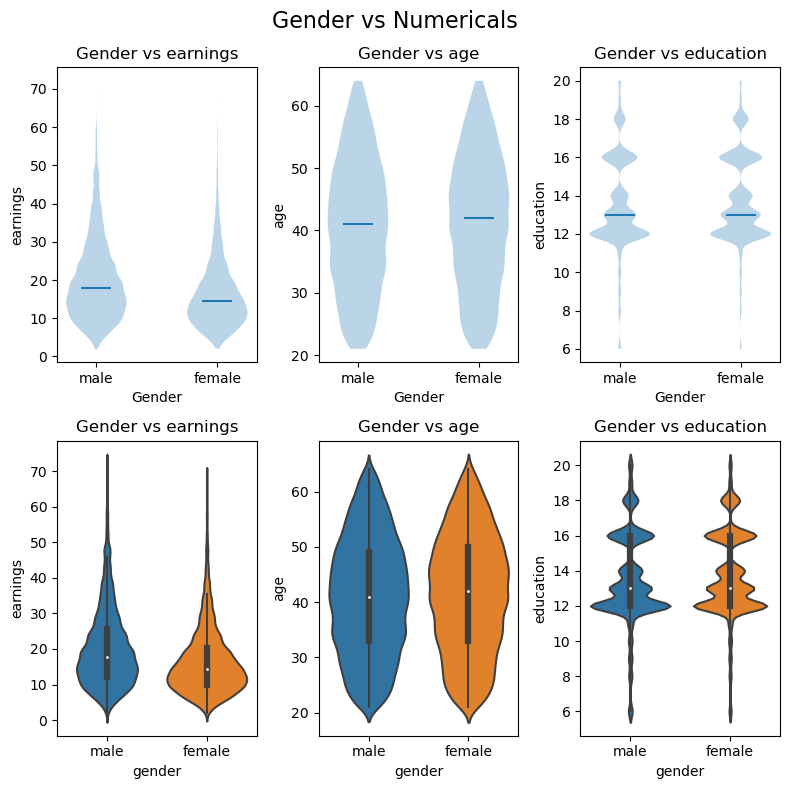

In [20]:
#introducing 2x3 plot and add title
fig, ax = plt.subplots(2,3,figsize=(8, 8))
plt.suptitle('Gender vs Numericals', fontsize=16)

#matplotlib violin plot
pos=0

#iterate through all numerical columns
for i in numerical_columns:
    categories = pop['gender'].unique()
    grouped_data = [pop[pop['gender'] == cat][i] for cat in categories]
    ax[0][pos].violinplot(grouped_data, showmedians=True, showextrema=False)
    ax[0][pos].set_xticks(np.arange(1, len(categories) + 1))
    ax[0][pos].set_xticklabels(categories)
    ax[0][pos].set_xlabel('Gender')
    ax[0][pos].set_ylabel(i)
    ax[0][pos].set_title('Gender vs {}'.format(i))
    pos+=1

#seaborn violin plot
pos=0

#iterate through all numerical columns
for i in numerical_columns:    
    sns.violinplot(x="gender", y=i, data=pop,ax=ax[1][pos])   
    ax[1][pos].set_title('Gender vs {}'.format(i)) 
    pos+=1 

#Display plot
plt.tight_layout()
plt.show()

__Insights__ : 
- __Gender vs Earnings__: Males tend to have a higher salary range compared to females. Also, males have higher median salary.
- __Gender vs Age__: The distribution of male and female participants is similar across all ages.
- __Gender vs Education__: Both male and female participants exhibit a similar educational distribution.

### Region vs Numericals (Earnings, Age, Education)

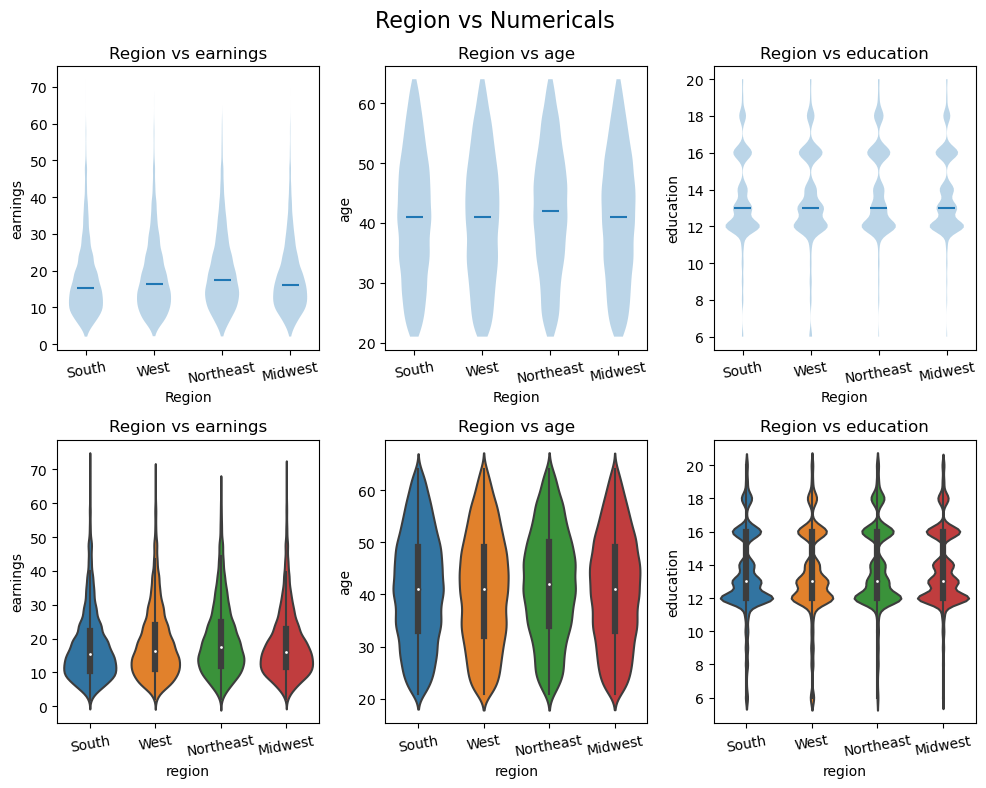

In [21]:
#introducing 2x3 plot and add title
fig, ax = plt.subplots(2,3,figsize=(10, 8))
plt.suptitle('Region vs Numericals', fontsize=16)

#matplotlib violin plot
pos=0

#iterate through all numerical columns
for i in numerical_columns:
    categories = pop['region'].unique()
    grouped_data = [pop[pop['region'] == cat][i] for cat in categories]
    ax[0][pos].violinplot(grouped_data, showmedians=True, showextrema=False)
    ax[0][pos].set_xticks(np.arange(1, len(categories) + 1))
    ax[0][pos].set_xticklabels(categories)
    ax[0][pos].set_xlabel('Region')
    ax[0][pos].set_ylabel(i)
    ax[0][pos].set_title('Region vs {}'.format(i))
    ax[0][pos].tick_params(axis='x', rotation=10)
    pos+=1

#seaborn violin plot
pos=0

#iterate through all numerical columns
for i in numerical_columns:    
    sns.violinplot(x="region", y=i, data=pop,ax=ax[1][pos])   
    ax[1][pos].set_title('Region vs {}'.format(i)) 
    ax[1][pos].tick_params(axis='x', rotation=10)
    pos+=1 

#Display plot
plt.tight_layout()
plt.show()

__Insights__ : 
- __Region vs Earnings__: Earnings in various regions across the United States exhibit a generally similar spread. However, the Southern region has a slightly higher range of earnings compared to other regions, followed by the Midwest region.
- __Region vs Age__: The age distribution in different regions of the United States demonstrates a uniform distribution and range. Notably, the Northeast region has a slightly higher median age compared to other regions.
- __Region vs Education__: Education levels across different regions of the United States show an overall similar distribution and range. It's worth noting that participants from the South and Midwest regions have a higher percentage of individuals with their highest education level at grade 12.

### Region vs Gender

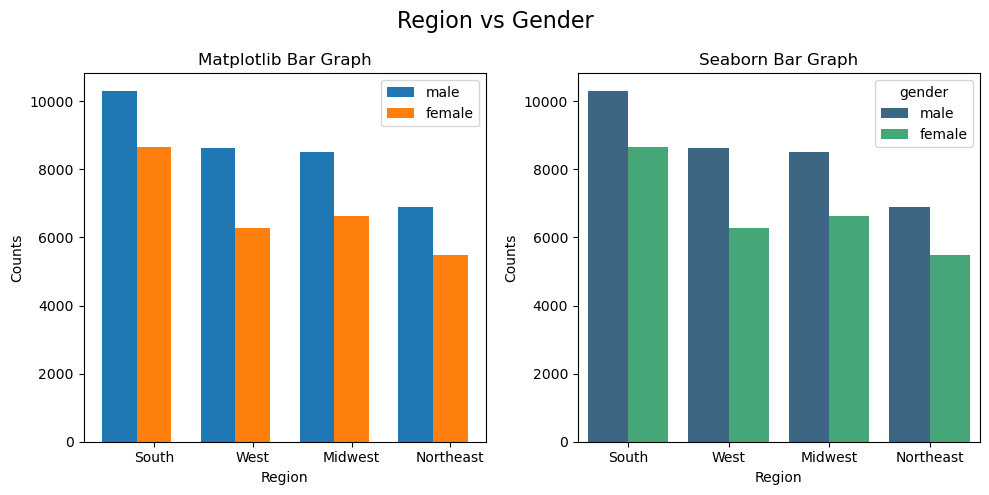

In [22]:
# Create a crosstab with Frquency values of Region and Gender
CrosstabResult=pd.crosstab(index=pop['region'],columns=pop['gender'])

#Sort the rows
CrosstabResult=CrosstabResult.sort_values(by='male', ascending=False)

#introducing 10,5 plot and add title
fig, ax = plt.subplots(1,2,figsize=(10, 5))
plt.suptitle('Region vs Gender', fontsize=16)

#matplotlib bar graph

# Set the width of the bars
bar_width = 0.35  

# Set the x-axis values for the bars
x = np.arange(len(CrosstabResult))

# Create the side-by-side bars
ax[0].bar(x - bar_width/2, CrosstabResult['male'], width=bar_width, label='male')
ax[0].bar(x + bar_width/2, CrosstabResult['female'], width=bar_width, label='female')

# Add labels and legend
ax[0].set_title('Matplotlib Bar Graph')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Counts')
ax[0].set_xticks([i + bar_width/2 for i in x])
ax[0].set_xticklabels(list(CrosstabResult.index))
ax[0].legend()

# Create dataframe with value counts of Region and Gender
gender_region = pop[['region','gender']].value_counts().reset_index(name='counts')

#seaborn bar graph
sns.barplot(x='region', y='counts', data= gender_region, hue='gender', ax=ax[1], palette="viridis")

# Add labels and legend
ax[1].set_title('Seaborn Bar Graph')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Counts')

#Display plot
plt.tight_layout()
plt.show()

__Insights__ : 

From univariate analysis, it is already evident that a larger number of survey participants are from southern part of the USA followed by Midwest, West and Northeast. This graph displays a common trend that there are more male participants compared to female participants across all regions.

### Numerical Columns Comparison (Earnings, Age, Education)

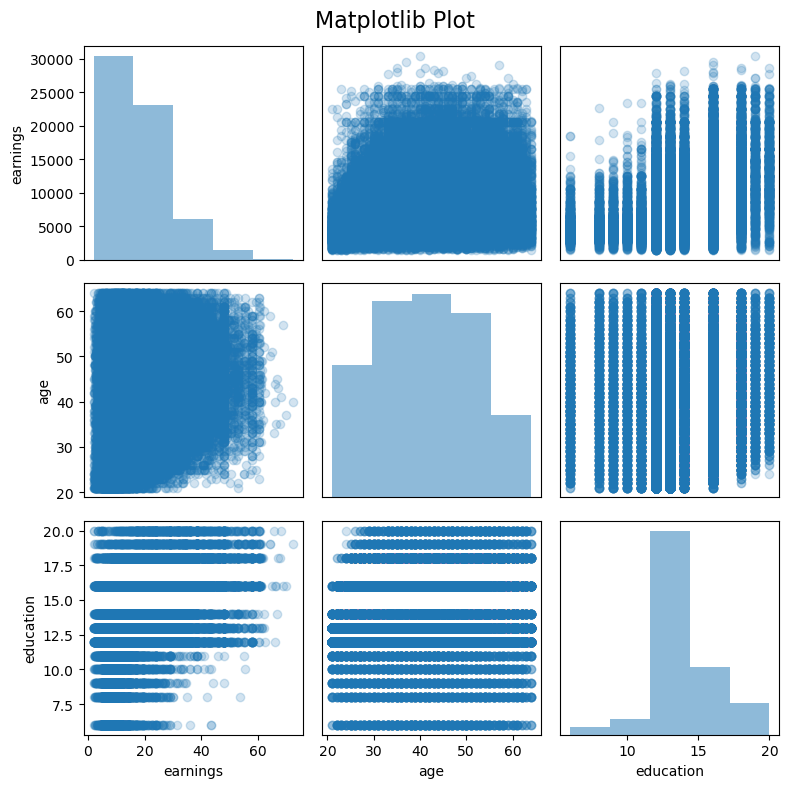

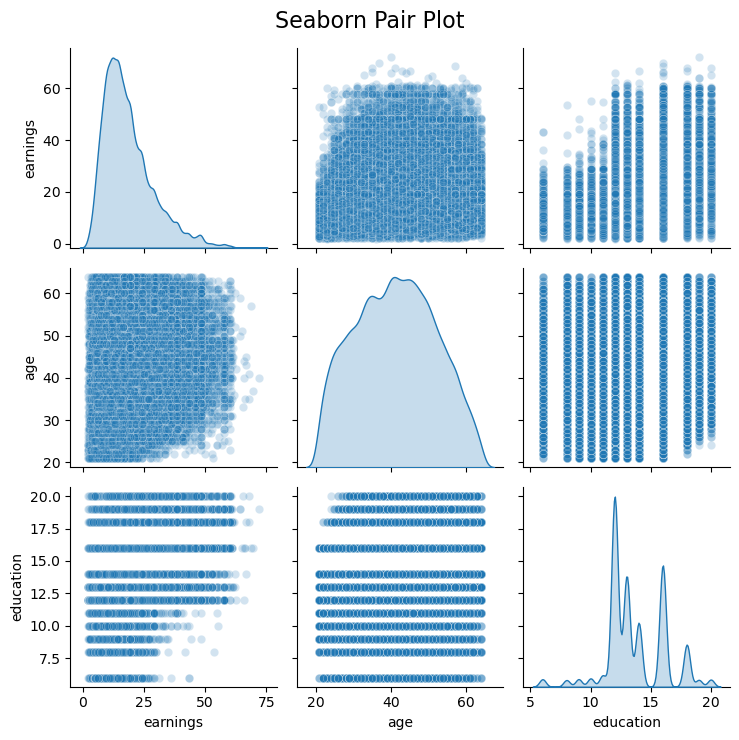

In [23]:
#define a new figure and add title
plt.figure(figsize=(8,8))
plt.suptitle('Matplotlib Plot', fontsize=16)

#Replicated seaborn's pairplot using the capabilites of matplotlib

#Initiate a position variable (used to specify subplot position)
pos=0

#Iterate through all numerical columns in both outer loop and inner loop
for i in numerical_columns:
    for j in numerical_columns:
        
        #Point to next subplot
        pos+=1
        plt.subplot(3,3,pos)
        
        #plot histogram if both numerical columns are same
        if i==j:
            plt.hist(pop[i], bins=5, alpha=0.5)
        #plot scatter plot between different numerical columns
        else:
            plt.scatter(y=i, x=j, data=pop, alpha=0.2)
        
        #Add labels in edge of the grid
        if pos%3==1:
            plt.ylabel(i)
        else:
            plt.yticks([])  
        
        #Remove ticks if it is not in edge of the grid
        if (3*3)-pos<3:
            plt.xlabel(j)
        else:
            plt.xticks([])  
            
#Display plot
plt.tight_layout()
plt.show()  

#seaborn pairplot plot with title
sns.pairplot(pop, diag_kind='kde', plot_kws={'alpha': 0.2}, height=2.5)
plt.suptitle('Seaborn Pair Plot', fontsize=16)

#Display plot
plt.tight_layout()
plt.show()

__Insights__:

__Histograms__

- **Earnings vs Earnings**: The plot displays positive skewness, suggesting that there are slightly more individuals earning towards the lower end of the range compared to the higher end.

- **Age vs Age**: The plot exhibits a symmetrical distribution, suggesting that the ages of the participants follow a normal distribution pattern.

- **Education vs Education**: The plot displays positive skewness, indicating that there are slightly more individuals with lower education levels than those with higher levels of education.

__Scatter Plots__

- **Earnings vs Age**: Population with age above 30 tends to have high earnings than the population below the age of 30.

- **Earnings vs Education**: The plot illustrates that the earnings range substantially increases with increase in years of education i.e., individuals with higher education have higher earnings.

- **Age vs Education**: While the plot shows a relatively even distribution, it hints that individuals between the ages of 20 to 23 are less likely to have attained their highest level of education. This aligns with the understanding that it takes time for individuals in this age range to complete their higher level of education.

## Multivariate Analysis

__Approach__
- Plot Graphs using both Matplotlib and Seaborn libraries.   
- Use Subplots to show the plots in the same view
- Use proper title, labels and tick params

### Gender Influence in Earnings, Education, Age

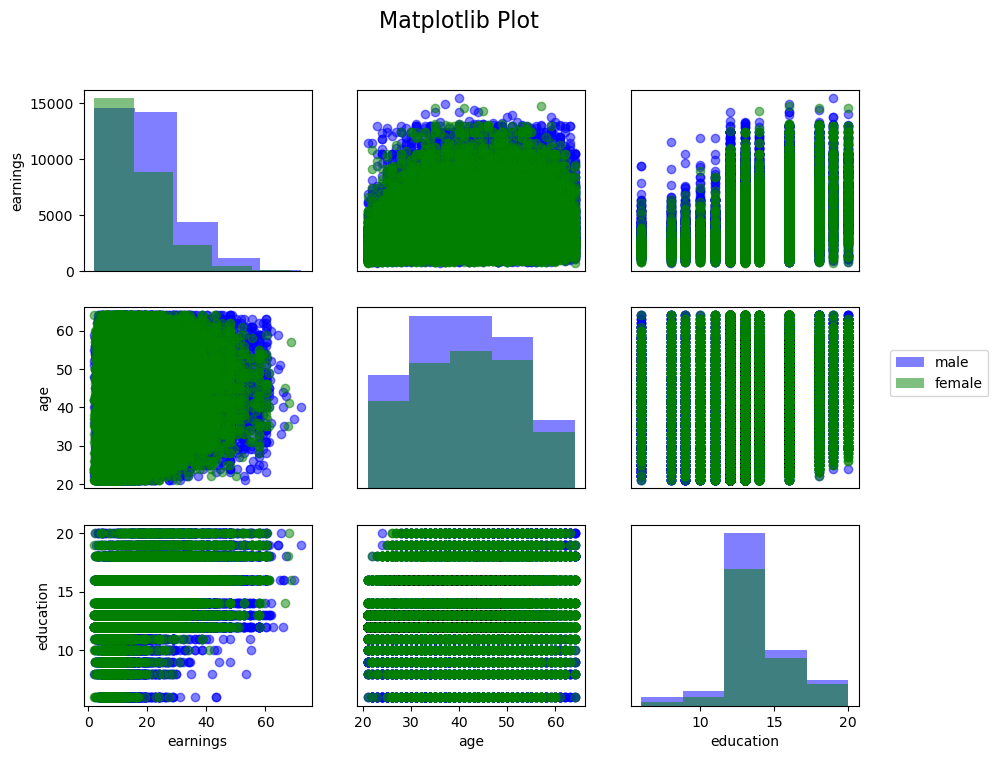

<Figure size 1000x800 with 0 Axes>

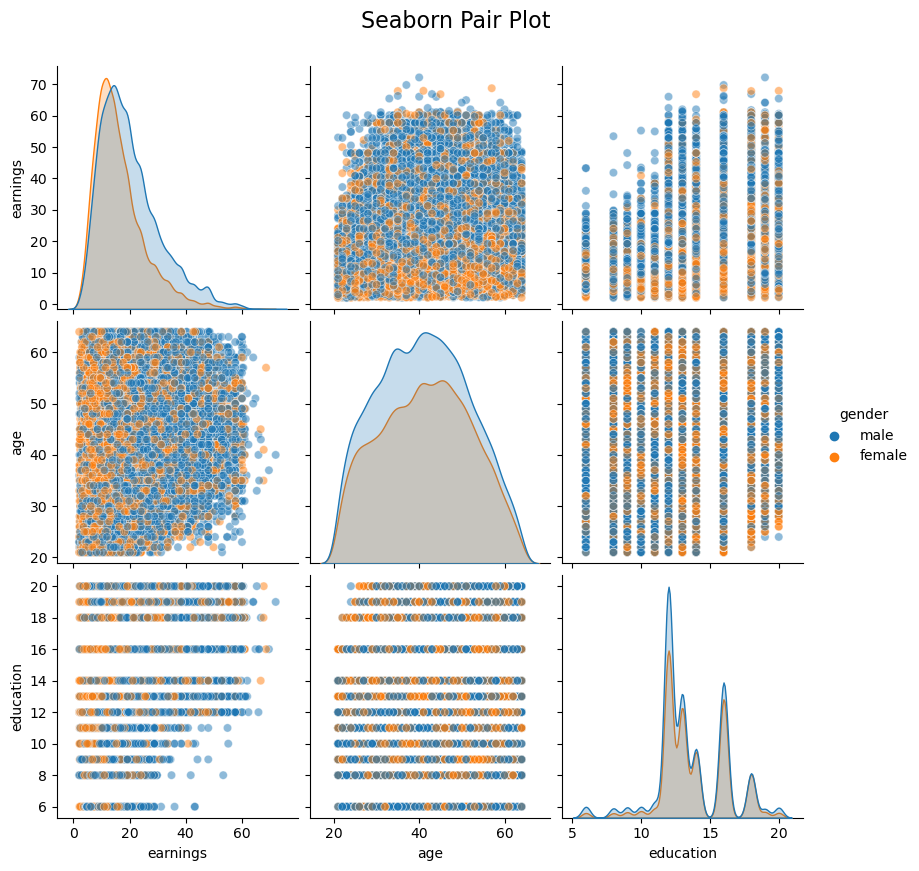

In [24]:
#introducing plot size and add title
plt.figure(figsize=(10,8))
plt.suptitle('Matplotlib Plot', fontsize=16)


#Replicated seaborn's pairplot using the capabilites of matplotlib along with legend

#Create a dictionary for color mapping
colors = {'male': 'b', 'female': 'g'}

#Initiate a position variable (used to specify subplot position)
pos=0

#Iterate through all numerical columns in both outer loop and inner loop
for i in numerical_columns:
    for j in numerical_columns:
        
        #Point to next subplot
        pos+=1
        plt.subplot(3,3,pos)
        
        #plot histogram if both numerical columns are same        
        if i==j:
            for s in pop['gender'].unique():
                plt.hist(pop[pop['gender'] == s][i], bins=5, alpha=0.5, label=s, color=colors[s])
        #plot scatter plot between different numerical columns
        else:
            for s in pop['gender'].unique():
                plt.scatter(pop[pop['gender'] == s][j], pop[pop['gender'] == s][i], alpha=0.5, label=s, color=colors[s])

        #Add labels in edge of the grid
        if pos%3==1:
            plt.ylabel(i)
        else:
            plt.yticks([])  
            
        #Remove ticks if it is not in edge of the grid
        if (3*3)-pos<3:
            plt.xlabel(j)
        else:
            plt.xticks([])  

#Legend Position
plt.legend(bbox_to_anchor=(1.6, 2), loc='upper right')

#Display plot
plt.show()  

#seaborn pairplot with legend
plt.figure(figsize=(10,8))
sns.pairplot(pop, diag_kind='kde', plot_kws={'alpha': 0.5}, height=2.75, hue='gender')
plt.suptitle('Seaborn Pair Plot', fontsize=16, y=1.05)
plt.show()

**Insights**:

__Histograms__

- **Earnings vs Earnings (Gender-wise)**: The plot displays positive skewness for both male and female. Also it reveals that the range and spread of men participants' earnings are larger compared to female.

- **Age vs Age (Gender-wise)**: The plot exhibits a symmetrical distribution for both male and female, It also shows the higher participation of men than women in the survey.

- **Education vs Education (Gender-wise)**: The plot depicts that men have attained a higher level of education compared to women.

__Scatter Plots__

- **Earnings vs Age (Gender-wise)**: Population with age above 30 tends to have high earnings than the population below the age of 30. It is evident from the plot that there are more women in low earnings compared to men. Also there are more men in high earnings compared to women.

- **Earnings vs Education (Gender-wise)**: The plot illustrates that the earnings range substantially increases with increase in years of education i.e., individuals with higher education have higher earnings. The trend of men earning higher than women remains the same except at eduction level 14 and 20 where the highest earning individual is a women.


- **Age vs Education (Gender-wise)**:  While the plot shows a relatively even distribution, it hints that individuals between the ages of 20 to 23 are less likely to have attained their highest level of education. This aligns with the understanding that it takes time for individuals in this age range to complete their higher level of education. Men and women are evenly distributed regardless of their ages for all education year ranges.

# Inference

### What is the gender pay gap in different regions?

__Approach__:

- First the data is grouped by region and gender by aggregating earnings column (mean).
- Bar plot is created using both matplotlib and seaborn.

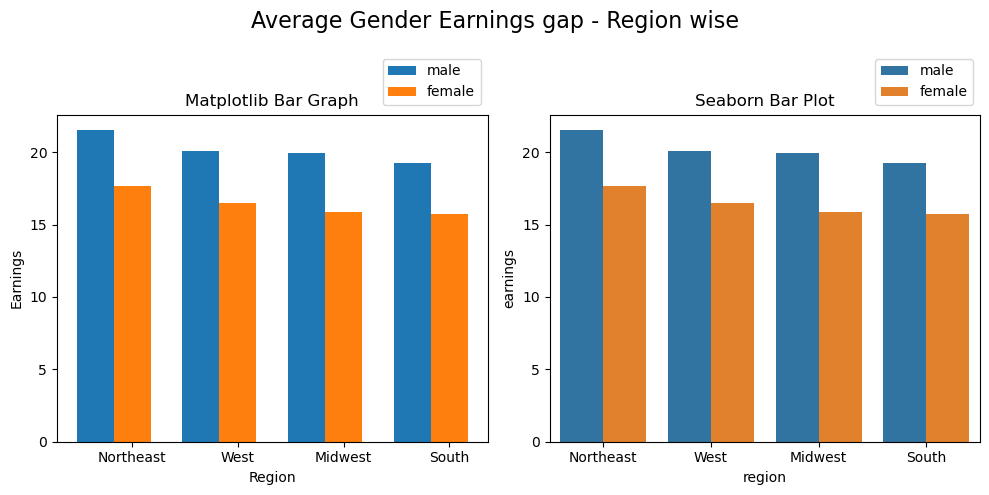

In [25]:
# Create a crosstab with Frquency values of Region and Gender
CrosstabResult=pd.crosstab(index=pop['region'],columns=pop['gender'], values=pop['earnings'], aggfunc='mean')

#Sort the rows
CrosstabResult=CrosstabResult.sort_values(by='male', ascending=False)

#Define a 1x2 plot and add title
fig, ax = plt.subplots(1,2,figsize=(10, 5))
plt.suptitle('Average Gender Earnings gap - Region wise', fontsize=16)

#matplotlib bar graph

# Set the width of the bars
bar_width = 0.35  

# Set the x-axis values for the bars
x = np.arange(len(CrosstabResult))

# Create the side-by-side bars
ax[0].bar(x - bar_width/2, CrosstabResult['male'], width=bar_width, label='male')
ax[0].bar(x + bar_width/2, CrosstabResult['female'], width=bar_width, label='female')

# Add labels and legend
ax[0].set_title('Matplotlib Bar Graph')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Earnings')
ax[0].set_xticks([i + bar_width/2 for i in x])
ax[0].set_xticklabels(list(CrosstabResult.index))
ax[0].legend(bbox_to_anchor=(1,1.1), loc='right')

#Grouping of data based on region and gender feature and aggregating based on the earnings column
grouped = pop.groupby(['region', 'gender'])['earnings'].mean().reset_index().sort_values(by='earnings',ascending=False)

#seaborn bar plot
sns.barplot(x="region", y='earnings', data=grouped, ax=ax[1], hue='gender')  

# Add labels and legend
ax[1].set_title('Seaborn Bar Plot') 
ax[1].legend(bbox_to_anchor=(1,1.1), loc='right')

#Display plot
plt.tight_layout()
plt.show()

__Insights__: 

The plot reveals a uniform gender pay gap in the United States, where males earn higher average incomes compared to females, regardless of the region. Notably, Midwest region exhibits the most pronounced gender pay disparity among all the regions.

### How does the earnings vary by age and education level?

__Approach__:
- Group Age is into different bins and aggregate the earnings (mean).
- Create a 2D array using dataframe to create heatmap with  matplotlib
- Plot Heatmap using both matplotlib and seaborn library to understand how the earnings vary on age and education level

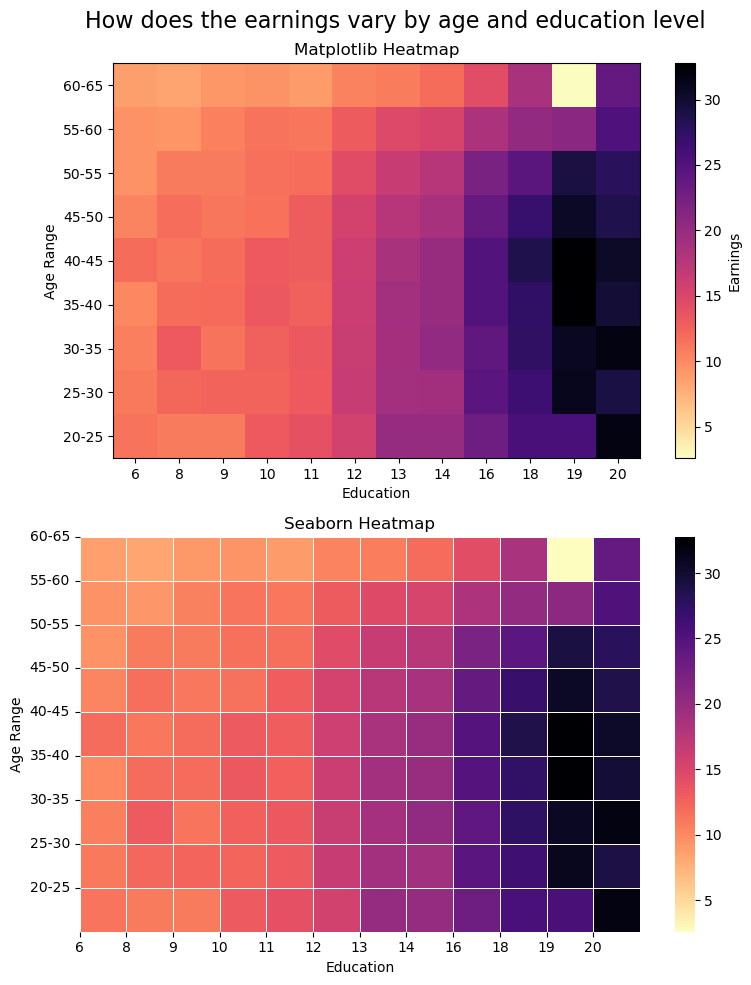

In [26]:
# Define edge values of bins and bin names
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
age_labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65']

# Use pd.cut() to create a new column with age bins
pop['agerange'] = pd.cut(pop['age'], bins=age_bins, labels=age_labels, right=False)

# Aggregate the data
grouped = pop.groupby(['agerange', 'education'])['earnings'].mean().reset_index().sort_values(by=['agerange','education'])

# Create a 2d array from the dataframe
arr = np.empty((len(grouped['agerange'].unique()),len(grouped['education'].unique())))

i=0
for age in grouped['agerange'].unique():
    j=0
    for education in grouped['education'].unique():
        temp=grouped[(grouped['agerange']==age) & (grouped['education']==education)]
        if len(temp)==0:
            val=np.nan
        else:
            val=temp.iloc[0,2]
        arr[i][j]=val
        j+=1
    i+=1

# Define a plot and add title
plt.figure(figsize=(8,10))
plt.suptitle('How does the earnings vary by age and education level', fontsize=16)

# Matplotlib Heatmap

plt.subplot(2,1,1)
plt.title('Matplotlib Heatmap')

plt.imshow(arr, cmap='magma_r')

#Add labels and other parameters

x_labels = grouped['education'].unique()
y_labels = grouped['agerange'].unique()[::-1]
plt.xlabel('Education')
plt.ylabel('Age Range')
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(len(y_labels)), y_labels)
plt.tick_params(axis='y', rotation=0)
color_bar = plt.colorbar()
color_bar.set_label('Earnings', rotation=90)

# Seaborn Heatmap

plt.subplot(2,1,2)
plt.title('Seaborn Heatmap')

sns.heatmap(arr, cmap='magma_r', linewidth=0.5)

#Add labels and other parameters

x_labels = grouped['education'].unique()
y_labels = grouped['agerange'].unique()[::-1]
plt.xlabel('Education')
plt.ylabel('Age Range')
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(len(y_labels)), y_labels)
plt.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

__Insights__: 

The plot indicates that a strong educational background is associated with higher earnings, irrespective of participants' age. This finding highlights that individuals can achieve significant income levels across various age groups, emphasizing the importance of education as a key factor in income potential.

### How do earnings vary with age and education level, and is this variation influenced by gender?

__Approach__:
- Group Age is into different bins 
- Divide the dataframe for male and female and aggregate the earnings (mean).
- Create a 2D array using dataframe to create heatmap with  matplotlib
- Plot Heatmap using both matplotlib and seaborn library to understand how the earnings vary on age and education level

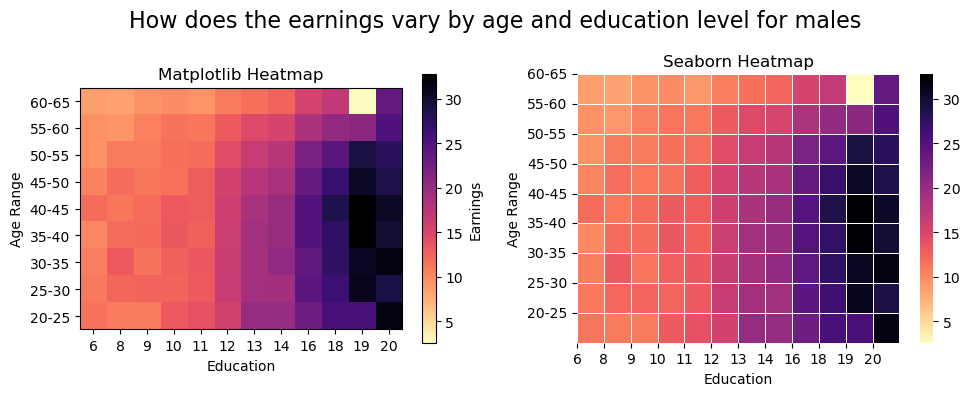

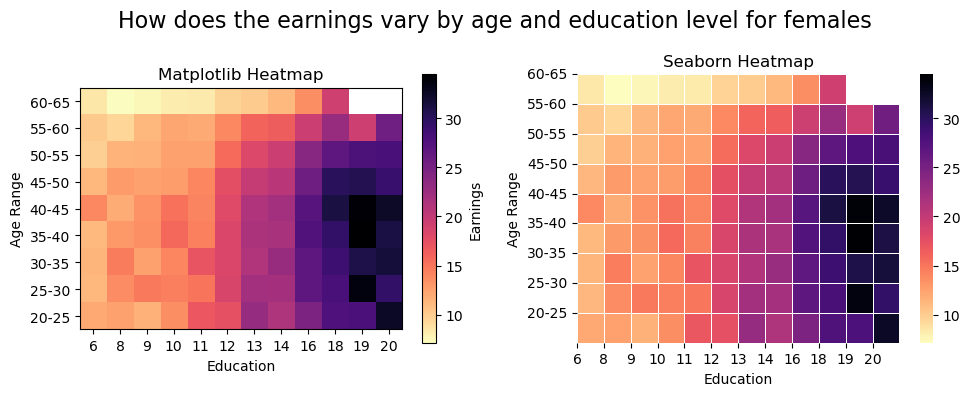

In [27]:
# Create a 2d array from the dataframe
def df_to_2darr(df):
    '''Create a 2d array from the dataframe'''
    arr = np.empty((len(df['agerange'].unique()),len(df['education'].unique())))

    i=0
    for age in df['agerange'].unique():
        j=0
        for education in df['education'].unique():
            temp=grouped[(df['agerange']==age) & (df['education']==education)]
            if len(temp)==0:
                val=np.nan
            else:
                val=temp.iloc[0,2]
            arr[i][j]=val
            j+=1
        i+=1
        return arr
        

# Define edge values of bins and bin names
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
age_labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65']

# Use pd.cut() to create a new column with age bins
pop['agerange'] = pd.cut(pop['age'], bins=age_bins, labels=age_labels, right=False)

#itearte for male and female
for i in ('male','female'):

    # Aggregate the data
    grouped = pop[pop['gender']==i].groupby(['agerange', 'education'])['earnings'].mean().reset_index().sort_values(by=['agerange','education'])

    # Define a plot and add title
    plt.figure(figsize=(10,4))
    plt.suptitle('How does the earnings vary by age and education level for {}s'.format(i), fontsize=16)

    # Matplotlib Heatmap

    plt.subplot(1,2,1)
    plt.title('Matplotlib Heatmap')

    plt.imshow(df_to_2darr(grouped), cmap='magma_r')

    #Add labels and other parameters
    
    x_labels = grouped['education'].unique()
    y_labels = grouped['agerange'].unique()[::-1]
    plt.xlabel('Education')
    plt.ylabel('Age Range')
    plt.xticks(range(len(x_labels)), x_labels)
    plt.yticks(range(len(y_labels)), y_labels)
    plt.tick_params(axis='y', rotation=0)
    color_bar = plt.colorbar()
    color_bar.set_label('Earnings', rotation=90)

    # Seaborn Heatmap

    plt.subplot(1,2,2)
    plt.title('Seaborn Heatmap')

    sns.heatmap(df_to_2darr(grouped), cmap='magma_r', linewidth=0.5)

    #Add labels
    
    x_labels = grouped['education'].unique()
    y_labels = grouped['agerange'].unique()[::-1]    
    plt.xlabel('Education')
    plt.ylabel('Age Range')
    plt.xticks(range(len(x_labels)), x_labels)
    plt.yticks(range(len(y_labels)), y_labels)
    plt.tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()

__Insights:__

The plot indicates that a strong educational background is associated with higher earnings, irrespective of participants' age. This finding highlights that individuals can achieve significant income levels across various age groups, emphasizing the importance of education as a key factor in determining  income potential.

We can observe a drastic difference in earnings between male and female at the age mark of 60-65 across all educational levels

Females with education level less than 12 years have lesser earnings compared to males with same education level. But there is little to no earnings gap between males and females with higher education level. This again strongly emphasizes the importance of education as a key factor in income determining  potential.

# Conclusion

We've worked on answering the research questions in the direction of learning about gender pay gap and how the factors like age, region and education level influences the same. We also tried to look if we can find any insights that can help us to solve this issue. The dataset provided a diverse representation of the population, encompassing various regions across the USA, participants of different ages and genders, and individuals with varying levels of education.

On analyzing the data we observed that there is considerable difference in average earnings between male and female across all regions and age. On the brighter side, there is little to no earnings gap between males and females with higher education level. This strongly emphasizes the importance of education as a key factor in determining  income potential.

In conclusion, our research highlights the significance of education in addressing the gender pay gap issue. Achieving quality education can lead to a substantial increase in income, leveling the playing field and reducing the gender pay gap.

# Reference

__For Data__

Online complements to Stock and Watson (2007)

Stock, J.H. and Watson, M.W. (2007). Introduction to Econometrics, 2nd ed. Boston: Addison Wesley.

__For Coding__

https://matplotlib.org

https://seaborn.pydata.org

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html